<a id="top"></a>
# Clustering Methods For NLP

***

## Learning Goals

```
By the end of this tutorial, you will:

- Understand how to generate test data and quantify qualitative data to be passed into KMeans.
- Fit a KMeans model to identify clusters within provided data.
- Vectorize qualitative data with a TFIDF model.
- Perform Latent Semantic Analysis for data smoothing.
- Visualize the generated clusters and assess the most frequent data points.
  target.

```

## K-Means

This tutorial will first explore a basic quantiative use for K-Means. This will generate, process, and then visualize the clusters outputted with the KMean function. The second section of this tutorial will take text data and generate clusters using Term Frequency - Inverse Document Frequency. This serves as a structured tutorial, that takes code from the above section and prompts code input to match the provided outputs.  

KMeans is an unsupervised clustering method used in machine learning which calculates the Euclidian distance to generate a measure of similarity (and inversely dissimilarity) and represent data in an n amount of clusters. It is a probabilitic style, thus, it specifies a generation tactic to reveal potential hidden clusters through exploration. It operates under a hard assignment strategy where only one cluster is assigned with the highest probability for match to the centroid (or the mean). Finally, it is a flat clustering method, where there is only a single clustering without hierarchical divisions. (Grimmer, Roberts, Stewart: 2024).
___

## Imports
The libraries which will fall under four main categories: data management, data visualization, data querying, and natrual language processing.

📖 For more information about these libraries, each documentation is linked.

*Data Management:*
*   [Pandas](https://pandas.pydata.org/docs/user_guide/index.html): Used to display arrays or dictionaries in a dataframe.
*   [Numpy](https://numpy.org/doc/stable/index.html#numpy-docs-mainpage): Provides supports for math related functions and specifically data generation in this tutorial.
*   [Collections]("https://docs.python.org/3/library/collections.html"): A module which allows for specalized container datatypes.


*Data Visualization:*
*   [Matplotlib.pyplot](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html): Used to plot the KMeans clusters

*Evaluation*
*   [Time](https://docs.python.org/3/library/time.html): A module used in this tutorial to evaluate the speed of the function.

*Natural Language Processing*
*   [sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html): Used to reserve data for training
*   [sklearn.datasets.make_blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#make-blobs): Used to generate example
data
*   [sklearn import metrics]("https://scikit-learn.org/stable/api/sklearn.metrics.html#module-sklearn.metrics"): Provides metrics for evaluating model performance.
*   [sklearn.cluster import KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#kmeans): The function used to generate clusters.
*   [sklearn.feature_extraction.text import Tfidf Vectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html#sklearn.feature_extraction.text.TfidfVectorizer): Used to incorporate an understanding of corpus vocabulary when vectorizing the text.










In [ ]:
'''LIBRARY DOWNLOADING'''

%pip install nltk
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.3/527.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.


In [1]:
  '''LIBRARY IMPORTING'''

  ## DATA MANAGEMENT
import pandas as pd
import numpy as np
import collections
from collections import defaultdict

  ## DATA VISUALIZATION
import matplotlib.pyplot as plt

  ## EVALUATION
from time import time
from sklearn.metrics.pairwise import pairwise_distances_argmin

  ## NATURAL LANGUAGE PROCESSING
#import nltk
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn import metrics

  ## Specific to K-Means:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer


  ## Specific to Affinity Propagation:
from sklearn.cluster import AffinityPropagation

***

#### **How does the K-Means Function Work?**

For this data, it will be randomly generated to see the kinds of data and how the kmeans function works.



1.   Data is imported or established
2.   Clusters are computed with KMeans
3.   The Model is fit with additional sample data
4.   Cluster Visualization

📖 For further elaboration reference the source code for this section of the tutorial at [Scikit-Learn's explanation here](https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py).


**1. Data is imported or established**

During this phase, you will have to start by selecting centroids. This is a process in inductive research that gives power to the researcher for determining what clusters could look like. A cluster is developed around the 'centroid' which is the mean of the fitted values. K-means searchers for the amount of clusters passed in, and attempts to create a parition which has the most space between points.

📖 For further reading about selecting initial centroids efficiently, [reference this article](https://cvr.ac.in/ojs/index.php/cvracin/article/view/734/594) published by S. Bhavani and N. Subhash Chandra.

In [ ]:
  ## The random seed here is to allow reproduciable outputs.
np.random.seed(12)

  ## Defining the centers here what makes the K-Means Function an Algorithimic Flat method for clustering.
centers = [[1,1],[-1,-1],[1,-1]]

  ## This tells the model to generate 3 clusters
n_clusters = len(centers)

The *make_blobs()* function takes sample number as a parameter, features, centers, cluster standard deviation, and random state inputs. This function is intended to "generate isotropic gaussian blobs for clustering". This function generates quantiative datasets with features in the sample, which will then divide points evenly across.

The function outputs two arrays, the first is an array of points that determine the similarity between vectors. The second output is the labels for each sample.

📖 To read the documentation for this function it can be found at scikit-learns documentation linked [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs).

In [ ]:
  ## Checking what the function output looks like.
make_blobs(n_samples=10, centers = centers, cluster_std=0.7)

(array([[-0.23283072, -1.85061816],
        [ 1.52719998, -0.07430494],
        [ 1.33109008,  0.52300188],
        [ 1.16970765, -0.19051494],
        [ 1.93964946, -1.08550485],
        [ 1.70876083, -1.6397084 ],
        [-1.56488732,  1.01027358],
        [ 1.00358895,  0.91584063],
        [ 0.27932885, -0.15314249],
        [-1.41847604, -0.6692801 ]]),
 array([1, 0, 0, 0, 2, 2, 1, 0, 2, 1]))

In [ ]:
  ## Let's assign the outputs of the function to the variables X for samples and labels_true for the label
X, labels_true = make_blobs(n_samples=3000, centers = centers, cluster_std=0.7)

**2. Clusters are Computed With KMeans**

The KMeans function takes the parameters:
```
*   n_clusters: an integer, default is 8. This dictates the amount of clusters to form and centroids to generate.
*   init: Either k-means++ (intial cluster centroids using sampling empirically) or random (chooses cluster observations from data for initial centroids randomly)
*   n_init: Either auto (number of iterations dependent on the value of init defined) or an integer, which dictates that times of k-means algorithim run with a different seed.
*   max_iter: The default is 300 iterations, and can be changed based on desired resoures dedicated.

```

KMeans will return a KMeans object that can be manipulated using the above attributes. The goal of the KMeans will generate attributes such as the cluster_centers, labels_, interita_ (Sum of Square Distances between the closest cluster center), and n_features_in. This tells the user new ways to organize the data to help identify new clusters, or solidify the strength of prior held theories.


📖 The KMeans function documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).

In [ ]:
  ## The parameters for this sample define the clusteroids as 3 and a similar seed above as 10
k_means = KMeans(init="k-means++", n_clusters=3, n_init=10)

#### **3. Model Is Fit With Additional Data**

The attribute **fit()** is what computes the k-means clustering from the object. X is passed in, which was the array defined from the make_blobs function, or would be the other data made available. The attribute has an optional parameter, sample_weight, which on default does not distribute weights unevenly. Fit is the process of calculating which cluster the data point should belong to.

Time is used in this step to track how long it takes to fit the model. In more complex uses of KMeans methods called 'time complexity' can be used to optimize and consider the maximum number clusters possible.

📖 For a more detailed understanding of fitting the model and performance [this paper by M. Ahmed, R. Seraj, and S.M. Shamsul Islam.](https://www.mdpi.com/2079-9292/9/8/1295) published in 2020.

In [ ]:
## Tracking time during this stage will inform us how the model is using computational resources.
t0 = time.time()
fitted = k_means.fit(X)
t_batch = time.time() - t0

#### **4. Cluster Evaluation**

First, the parameters for visualization will be instantiated. This is the cluster centers, and the means labels.

**Cluster_Centers** is an attribute of the kmeans object, and provides the corrdinated of the adjusted centers. Remeber from earlier that the original clusters that was provided was at (1,1), (-1,-1), and (1,-1). It should be noted that if KMeans was interuppted before full convergence, the clusters will not be consistent with the labels.

In [ ]:
  ## Storing the cluster centers array in a variable.
k_means_cluster_centers = k_means.cluster_centers_

In [ ]:
  ##Examining the original output of the function
pairwise_distances_argmin(X, k_means_cluster_centers)

array([1, 2, 1, ..., 1, 2, 0])

In [ ]:
  ## Assinging the output to k_means_labels
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

#### **5. Cluster Visualization**

The source code for this graph is the scikit learn tutorial "[Comparison of the K-Means and MiniBatchKMeans clustering algorithms](https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#sphx-glr-auto-examples-cluster-plot-mini-batch-kmeans-py)"

This graph first plots each cluster point and then plots the current centroid for the cluster. Additionally, it includes the train time it took to train the model, and represent it. This visualization can tell a researcher about the overlap of the clusters,  distance between each other, and the outliers for each cluster. Visualization provides a quick overview of the accuracy and similarity of the clustering method.

For this random data, it is more difficult to assess the accuracy, as it was randomly generated.

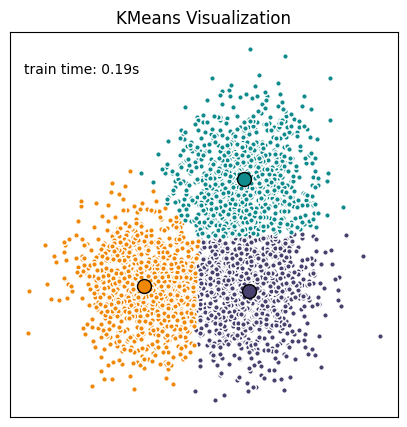

In [ ]:
fig, ax = plt.subplots(figsize=(5,5))
#colors= ["#49416D", "#F18805", "#0F8B8D"]
colors = ["#49416D", "#F18805", "#0F8B8D"]

## iterating through each cluster and extracting the k value and closest y
for k, col in zip(range(n_clusters), colors):

  ## identify current cluster members if the label value is equivalent to k
  curr_members = k_means_labels == k

  ## extracting the cluster_centers
  cluster_center = k_means.cluster_centers_[k]

  ## plotting the clusters, curr_members 0 and 1 are the x and y values from the array,
  ## markerfacecolor sets the clusters color, and "w" and "." are stylistic.
  ax.plot(X[curr_members, 0], X[curr_members,1], "o", markerfacecolor=col,markeredgecolor='w',markersize=4)

  ## plotting the cluster centers for each column with x and y values with other stylized parameters
  ax.plot(
      cluster_center[0],
      cluster_center[1],
      "o",
      markerfacecolor = col,
      markeredgecolor = "k",
      markersize = 10
  )

  ## setting plot metadata
ax.set_title("KMeans Visualization")
ax.set_xticks(())
ax.set_yticks(())
plt.text(-3.5,3,"train time: %.2fs"%(t_batch));

---

# **Applying KMeans to Text Data**

The code used in this section of the tutorial is modeled after Scikit-Learns example "[Clustering Text Documents Using K-Means](https://scikit-learn.org/stable/auto_examples/text/plot_document_clustering.html#sphx-glr-auto-examples-text-plot-document-clustering-py)".

#### **1. Data is Imported & Established**

Data used in this tutorial will be provided from scikit-learn to make data more accesssible on multiple devices.

The data used in this tutorial is the '20 News Groups' Data Set. It contains about 18000 newsgroups posts on 20 different topics.

 📖 More information about the dataset can be found at this [hyperlink]("https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#fetch-20newsgroups"), or at the repository linked there as well.

In [2]:
''' DATA LOADING '''

from sklearn.datasets import fetch_20newsgroups

In [3]:
## These are some of the categories in the dataset, feel free to change to different categories outlined in the documentation!
categories = [
    'rec.autos',
    'sci.electronics',
    'talk.religion.misc',
    'talk.politics.misc'
]

  ## The documentation page for the dataset suggests removing headers, footers, and quotes to strip and metadata.
dataset = fetch_20newsgroups(
    remove= ('headers','footers','quotes'),
    subset = 'all',
    categories=categories,
    shuffle = True,
    random_state =10,
)

## generating labels and a true_k to pass into the K Means function
labels = dataset.target
unique_labels,category_sizes = np.unique(labels,return_counts=True)
true_k = unique_labels.shape[0]

print(f"{len(dataset.data)} documents - {true_k} categories")


3377 documents - 4 categories


In [4]:
dataset.data[2]

'\nNot hard, you can do the refreshing and access cycles by software, but\nthis hogs most of the available CPU cycles on a low-end controller.\nI\'ve seen some application note from Philips that used one of their\n8051 derivatives as a printer buffer, with up to 1MB of dynamic ram\nthat was accessed and refreshed with software bit-banging.\n\nAnother alternative would be to use one of those nice DRAM controller\nchips that "create static RAM appearance" and all that, but they may\nbe too expensive to make it worthwhile.'

**TF-IDF Vectorization**

Term Frequency - Inverse Document Frequency is a practice of vectorizing texts and then clustering them based with a mindfulness around rare or unique words. TF-IDF weights words based on their pressence in documents and then generates rankings for similairty of documents at large. KMeans and TF-IDF complement each other because of their clustering strategies to identify (dis)similarity between documents.

For the purposes of this tutorial, the TF-IDF vectorizer converts raw documents to a matrix of TF-IDF features. This is similar to the Count vectorizer but incorporates weighting to account for word frequency. The parameters for this function are:

```
*   input: either 'filename' (which expects multiple doucments), 'file'
 (which must be a read object), or 'content' which is the raw sequence of items to be vectorized.
*   encoding: defulat is 'utf-8', or a strig
*   decode_error: either 'strict' (default), 'ignore', or 'replace'.
*   max_df: default 1.0, takes a float or an int between 0.0 and 1.0. This builds a vocabulary which ignores terms which have specific vocabularies.
*   min_df: default 1, takes a float or an int, this is the inverse of max_df and is referencded as a 'cut-off'
*   stop_words: default is 'english', but can be given a list. this woll remove the resulting tokens. If stopwords is not defined, it is reccomended to provide a higher max_df value to automatically detect and filter stopwords.
```

The attributes used in this tutorial will be *.fit_transform* which learns the vocabulary and returns a document-term matrix.
  

📖 For an excellent overview of how TF-IDF can support KMeans reference [this article](https://d1wqtxts1xzle7.cloudfront.net/93625200/41_27717-libre.pdf?1667543704=&response-content-disposition=inline%3B+filename%3DDocument_classification_using_term_frequ.pdf&Expires=1724357583&Signature=fXPjbsZ9QPq4q-VpFflur4pyE7BTsGdS~bsg6J2FKPgBwk7X8foHN7ZJS-sdHzj9O2riqr7EAehN4wuA~eKmltLQ~Z0bKbg4rKzEX3~7K4gO0paDWg9NtPhEkne6tMZFTrIl58Z92U~Q-V5pm~a8pCy5KkmEtadYoFhF110tR-UC8QWKjMfXRf2YWtQShXkkPpTqZaQFEI7LNU9tqdjRy1cRDb1orr9YrD4rrlx-cLz~nUJQQ4HNVnagPu~3XhC6Y8V5Znodz7XlN0vD3IBjXnk0xYkbw6WHzcKjz91MkE6lM~py~L2o9NUXiOzpj5COin7GT069PmvJkBmSQ5UFNA__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA) published by Ibrahem Al-Obaydy et al from 2022.

📖 For documentation about the TF-IDF Vectorizer reference [the Scikit Learn documentation for it here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). There are many parameters and attributes which are outside of the scope of this tutorial.

In [5]:
  ## First, let's call the TfIDF Vectorizer, and inspect its output

  vectorizer = TfidfVectorizer(max_df = 0.5, min_df = 5, stop_words="english")

In [6]:
  ## The function returns a vectorizer object that can then be manipulated through its attributes.
print(type(vectorizer))
vectorizer

<class 'sklearn.feature_extraction.text.TfidfVectorizer'>


TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english')

In [7]:
  ## Let's uses the vectorizer to transform the data and return a document-term matrix. For metrix evaluation, let's also return the time and the quantity of features.
t0 = time()
X_tfidf = vectorizer.fit_transform(dataset.data)

print(f"vectorization done in {time() - t0:.3f} s")
print(f"n_samples: {X_tfidf.shape[0]}, n_features: {X_tfidf.shape[1]}")

vectorization done in 0.667 s
n_samples: 3377, n_features: 6852


In [8]:
  ## The X_tfidf variable now holds a matrix with thousands of different features from the text.
X_tfidf

<3377x6852 sparse matrix of type '<class 'numpy.float64'>'
	with 158765 stored elements in Compressed Sparse Row format>

#### **2. Defining A Function For Evaluation and Training**

The Classification Metrics used to assess the model are Homogeneity, Completeness, V-Measure, Adjusted Rand-Index, and Silhouette Coefficient.

*   [Homogeneity]("https://scikit-learn.org/stable/modules/generated/sklearn.metrics.homogeneity_score.html#sklearn.metrics.homogeneity_score"): A measure to test what proportion of the clusters contain data points that only belong to one class.
*   [Completeness]("https://scikit-learn.org/stable/modules/generated/sklearn.metrics.completeness_score.html#sklearn.metrics.completeness_score"): A measure to test if data points are members of a given class are elements of a similar cluster. If the attribute is switched to label_pred, it will return the homogeneity score.
*   [V - Measure]("https://scikit-learn.org/stable/modules/generated/sklearn.metrics.v_measure_score.html#sklearn.metrics.v_measure_score"): A measure of "harmonic mean between homogeneity and completeness"
*   [Adjusted Rand Index]("https://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html#sklearn.metrics.adjusted_rand_score"): A measure of similarity between clusters which accounts for chance. It explores how freuqently pairs of data are grouped with each other. An ARI of 0 indicates complete dissimilarity between the clusters, and 1 when the clusters are identical.
*   [Silhouette Coefficient]("https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score"): A metric to understand how an object is similar to both its cluster and other clusters.

This function takes a kmeans object, datapoints, desired evaluation name, and desired iterations to fit the model. It first stores the evaluation name for multiple iteration tracking and then creates storage containers for the scores and training times.  Next, for each desired iteration it defines a seed number, and then tracks the amount of time it takes to format the model. After fitting evaluation scores are applied to the dictionary to track the model performance. Each evaluation then has a mean score and standard devation to track the iterations. The return of this function is a series of evaluation metrics that can be used to compare models.

Benefits of using functions such as these, it allows for the training and comparisons across models. If desired the metrics for Homogeneity, Completeness, and others can be applied to other forms of clustering methods. This could give the researcher the ability to test out how different models such as soft or fuzzy clustering could impact the accuracy or desired representation of the clusters.


In [9]:
  ## Intalizing storage containers
d = collections.defaultdict(list)
evaluations = []
evaluations_std = []

In [10]:
## Defining the function which will both fit and evaluate at the same time.
## The parameters for this function are a kmeans object,
##  X labels, a name for the evaluation, and amount of training iterations
def fit_and_evaluate(km,X,name=None,n_runs=5):

    ## Storing the iteration name
  name=km.__class__.name__  if name is None else name

  ## Creating a storage container for training iterations and scores
  train_times = []
  scores = d

    ## Iterating through each random state to test different iterations of the model
  for seed in range(n_runs):
    km.set_params(random_state=seed)
    t0 = time()
    km.fit(X)
    train_times.append(time() - t0)

    ## Assessing the model for each iteration on performance metrics.
    scores['Homogeneity'].append(metrics.homogeneity_score(labels, km.labels_))
    scores['Completeness'].append(metrics.completeness_score(labels,km.labels_))
    scores['V-measure'].append(metrics.v_measure_score(labels, km.labels_))
    scores["Adjusted Rand-Index"].append(metrics.adjusted_rand_score(labels, km.labels_))
    scores['Silhouette Coefficient'].append(metrics.silhouette_score(X, km.labels_,sample_size = 2000))


    ## Converting the stored model training times to an array.
  train_times = np.asarray(train_times)

    ## Printing the different iterations training times
  print (f"clustering done in {train_times.mean():.2f} ± {train_times.std():.2f} s")

    ## Storing the evaluation and the evaluation standard deviation to later hold the mean score and STD foreach iteration.
  evaluation = {
      "estimator":name,
      "train_time": train_times.mean(),
  }
  evaluation_std = {
      "estimator":name,
      "train_time":train_times.std(),
  }

    ## Parsing through all of the score values to generate a mean and a standard deviation for the centroids.
  for score_name, score_values in scores.items():
    mean_score, std_score = np.mean(score_values), np.std(score_values)
    print(f"{score_name}: {mean_score:.3f} ± {std_score:.3f}")
    evaluation[score_name] = mean_score
    evaluation_std[score_name] = std_score

  evaluations.append(evaluation)
  evaluations_std.append(evaluation_std)


#### **3. Fitting the Model**

For text data, we will fit the model in two separate instances, the first using Raw TF-IDf vectorized data, and the second being a truncated version, which employs a process of regularization and smoothing to assisst in making the model more accurate.
  

TruncatedSVD is a method which specifally is used to reduce the complexity of the vectorized space. This is a process called 'Latent Semantic Analysis' (not to be confused with Latent Dirichlet Allocation). The goal of LSA is "for extracting and inferring relations of expected contextual usage of words in passages of discourse." (Landauer, Foltz, Laham: 1998) It generates a score which can be interpreted of the average meaning which attempts to be informed by theories of human knowledge acquisition.
  

The parameters used in this tutorial for TruncatedSVD are only n_components which defines the desired dimensionality of the data, the default is two but the reccommended value for LSA is 100 components.
  

📖 The documentation for the function Latent Semantic Analysis can be found [linked here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.TruncatedSVD.html#sklearn.decomposition.TruncatedSVD).

📖 If you are interseted in the early conceptual work around LSA, reference this paper published by Landauer, Foltz, and Laham in 1998 out of the Department of Psychology at CU Boulder 🦬!

In [18]:
## Defining a for loop to iterate five times and fir a new model each time.
for seed in range(5):

## Establishing a kmeans object with the unique labels identified earlier with a max iteratino of fifty, and the model will only run once with the random state as the seed.
  kmeans_obj=KMeans( n_clusters = true_k, max_iter=50, n_init = 1, random_state=seed)

  ## Fitting the KMeans object to the TF-IDf vectorized data
  kmeans = kmeans_obj.fit(X_tfidf)

  ## Assinging the outputted array to the cluster ids and the cluster sizes.
  cluster_ids, cluster_sizes = np.unique(kmeans.labels_, return_counts=True)

  ## Printing out the number of elements and the actual class labels for each of the four news categories.
  print(f"Number of elements assigned to each cluster: {cluster_sizes}")
print ()
print ("The true number of documents in each category according to the class labels"f"{category_sizes}")

Number of elements assigned to each cluster: [   1 3372    2    2]
Number of elements assigned to each cluster: [ 510  251 1862  754]
Number of elements assigned to each cluster: [   2 3373    1    1]
Number of elements assigned to each cluster: [ 315  426 1765  871]
Number of elements assigned to each cluster: [  74 1989  530  784]

The true number of documents in each category according to the class labels[990 984 775 628]


In [23]:
''' USING LSA AS A NORMALIZATION TECHNIQUE'''
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

## Assinging the acronym for LSA the truncated SVD role
## The pipeline constructs an object which holds the variables
lsa = make_pipeline(TruncatedSVD(n_components=100))

LSA done in 1.293 s
Explained variance of the SVD step: 17.2%


In [45]:
## Fitting the LSA model
t0 = time()
X_lsa = lsa.fit_transform(X_tfidf)
explained_variance = lsa[0].explained_variance_ratio_.sum()


print (f"LSA done in {time() - t0:.3f} s")
print (f"Explained variance of the SVD step: {explained_variance * 100:.1f}%")

## Storing the cluster centers and the labels to use later for graphing
lsa_cluster_centers = kmeans.cluster_centers_
lsa_kmeans_labels = pairwise_distances_argmin(X_lsa, lsa_cluster_centers)

LSA done in 1.927 s
Explained variance of the SVD step: 17.2%


#### **4. Cluster Evaluation**

Now, let's use the fit and the evaluate model to identify the metric scores for each iteration within the random state. The fit and evaluation model wil return the different values for the vectors.

In [26]:
## Now, lets use the fit and evaluate function to compare metric scores.

fit_and_evaluate(kmeans, X_tfidf, name="KMeans\tf-idf vectors")


clustering done in 0.16 ± 0.07 s
Homogeneity: 0.191 ± 0.157
Completeness: 0.295 ± 0.126
V-measure: 0.211 ± 0.173
Adjusted Rand-Index: 0.136 ± 0.113
Silhouette Coefficient: 0.009 ± 0.003


In [36]:
## Fitting and Evaluate the LSA
kmeans = KMeans(
    n_clusters=true_k,
    max_iter=100,
    n_init=1
)

fit_and_evaluate(kmeans,X_lsa,name='KMeans\nwith LSA on tf-idf vectors')

clustering done in 0.14 ± 0.05 s
Homogeneity: 0.208 ± 0.119
Completeness: 0.333 ± 0.097
V-measure: 0.244 ± 0.131
Adjusted Rand-Index: 0.148 ± 0.092
Silhouette Coefficient: 0.033 ± 0.025


**Comparing Tf-IDF Vectors with LSA applied Vectors**

*   Clustering Time: The LSA fitted model was clustered in less than half the time than the raw TF-IDF values consistently. The range for the TF-IDF model is much larger than the LSA version
*   Homogeneity: The LSA clusters have a higher evaluation of single classified data points with a smaller standard deviation than the TF-IDF model.
*   Completeness: The LSA clusters have a higher completeness score, indicating the clusters had similar group membership across multiple training iterations. The standard deviation was higher in the TF-IDF model indicating a larger range between models of similar performance.
*   V Measure: The LSA also has a higher V measure than the TF-IDF model, as expected due to the higher performance in both homogeneity and completeness.
*   Adjusted Rand-Index: While the LSA model has a higher Rand Index, the scores are close with each other. This indicates the clusters are not continually similar between iterations as both scores are below 0.5.
*   Silhouette Coeffient: The LSA had a much higher coefficient than the TF-IDF measure. This means that the objects within LSA clusters are more similarly grouped than the TF-IDF measure.


The continuous higher scores on the LSA model indicate better clustering performance across the board. This suggests that using LSA as a smoothing technique makes KMeans stronger than it would be vectoirzed without any additional preprocessing.

For the rest of the tutorial, the LSA KMeans model will be used for cluster analysis and visualization.






**Examining Cluster Content**

In [63]:
from tempfile import TemporaryDirectory
original_space_centroids = lsa[0].inverse_transform(kmeans.cluster_centers_)
order_centroids = original_space_centroids.argsort()[:,::-1]
terms = vectorizer.get_feature_names_out()

cluster_top5 = []
for i in range(true_k):
  print (f"Cluster {i}: ", end="")

  temp_wordlist = []
  for ind in order_centroids[i, :7]:
    print (f"{terms[ind]} ",end="")
    temp_wordlist.append(terms[ind])

  cluster_top5.append(temp_wordlist)
  print ()

Cluster 0: car cars engine dealer oil new just 
Cluster 1: just people like know don think use 
Cluster 2: baden bison mb ca sys6626 bari inqmind 
Cluster 3: men gay homosexual sex sexual people homosexuals 


#### **5. Cluster Visualization**

In [ ]:
''' Please use the following pseudocode to create the below visualization for the text data with the top words from the cluster.'''

## Create the plot


## Instantiating a color palette
colors = ["#D52941", "#4D9DE0", "#FFB20F","#464D77"]

## Iterate through each cluster and etract the K and col value to plot data points


  ## Identify the current cluster members if the label value is equivalent to K


  ## Extract the cluster centers using lsa_cluster_centers


  ## Plot the clusters and add sylistic parameters


## Iterate through each cluster and extract the K and col value to plot clusters and top words

  ## Plot the cluster centers for each cluster

  ## Plot text for each cluster
  word_str = ""
  for word in cluster_top5[k]:
    word_str = word_str +word+" "

  ax.text(cluster_center[0]+.025,cluster_center[1],word_str,fontsize=12,color="k",weight='bold')


## Add Plot Meta Data

ax.set_xticks(())
ax.set_yticks(())

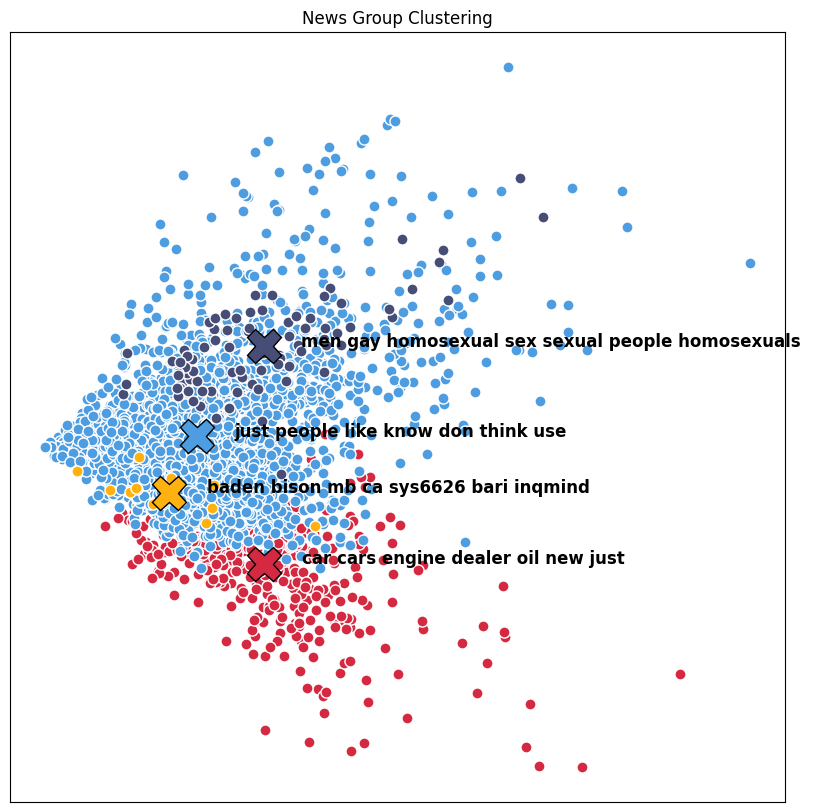

In [93]:
# @title
fig, ax = plt.subplots(figsize=(10,10))
colors = ["#D52941", "#4D9DE0", "#FFB20F","#464D77"]

## iterating through each cluster and extracting the k value and closest y
for k, col in zip(range(0,4), colors):

  ## identify current cluster members if the label value is equivalent to k
  curr_members = lsa_kmeans_labels == k

  ## extracting the cluster_centers
  cluster_center = lsa_cluster_centers[k]

  ## plotting the clusters, curr_members 0 and 1 are the x and y values from the array,
  ## markerfacecolor sets the clusters color, and "w" and "." are stylistic.
  ax.plot(X_lsa[curr_members, 0], X_lsa[curr_members,1], "o", markerfacecolor=col,markeredgecolor='w',markersize=8)

  ## plotting the cluster centers for each column with x and y values with other stylized parameters


## plotting the cluster centers and text last:

for k, col in zip(range(0,4),colors):

  cluster_center = lsa_cluster_centers[k]

  word_str = ""
  for word in cluster_top5[k]:
    word_str = word_str +word+" "

  ax.text(cluster_center[0]+.025,cluster_center[1],word_str,fontsize=12,color="k",weight='bold')

  ax.plot( cluster_center[0], cluster_center[1], "X",
      markerfacecolor = col,
      markeredgecolor = "k",
      markersize = 25
  )

  ## setting plot metadata
ax.set_title("News Group Clustering")
ax.set_xticks(())
ax.set_yticks(());

## About this Notebook
This notebook was generated for a Text as Data Independent Study through the University of Colorado at Boulder Information Science Department.

**Author:** Natalie Castro    
**Updated On:** August 21, 2024

## Citations
Provide your reader with guidelines on how to cite open source software and other resources in their own published work.

```
* Bhavani1, S., & Chandra, N. S. (2021). An Efficient Selection of Initial Centroids for K-Means Clustering. CVR Journal of Science and Technology, 21(1), 18–23.
* Chapter 12: Clustering. (2022). In J. Grimmer, M. E. Roberts, & B. M. Stewart, Text as data: A new framework for machine learning and the social sciences (pp. 123–145). Princeton University Press.
* Clustering text documents using k-means. (n.d.). Scikit-Learn. Retrieved August 20, 2024, from https://scikit-learn/stable/auto_examples/text/plot_document_clustering.html
*  Landauer, T. K., Foltz, P. W., & Laham, D. (1998). An introduction to latent semantic analysis. Discourse Processes, 25(2–3), 259–284. https://doi.org/10.1080/01638539809545028
```

***